In [20]:
from PaddleOCR.ppocr.modeling.architectures import build_model

import yaml
import paddle

config_path = "/home/code/PaddleOCR/configs/det/det_mv3_db.yml"
with open(config_path, "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    
model = build_model(config['Architecture'])
# print(model)
# print(type(model))
state_dict = paddle.load("/home/output/db_mv3/best_accuracy.pdparams")

model.set_state_dict(state_dict)


# x, y = box_det_dataset[0]
# x = paddle.to_tensor(x, dtype=paddle.float32)
# # paddle.device.set_device("cpu")
# x = paddle.transpose(x , perm=[2, 0, 1])
# x = paddle.expand(x, shape=[1, -1, -1, -1])
# x.shape
# model(x)

([], [])

In [9]:
import pandas as pd
from pathlib import Path

In [37]:

path.parent.mkdir(parents=True, exist_ok=True)
result_dict = {"a": 1, "b": 2}
for key, value in result_dict.items():
    result_dict[key] = [value]



    
df.to_csv(path)
df



,a,b
0,1,2
0,1,2
0,1,2


In [39]:
path = Path("/home/resource/test/results.csv")
df = pd.read_csv(path, index_col=0)
df

,precision,recall,hmean,fps,model
0,0.121597,0.325328,0.177027,10.646619,/home/resource/model/pretrained/ml_PP-OCRv3_de...
0,0.117100,0.265765,0.162569,10.627648,/home/resource/model/pretrained/en_PP-OCRv3_de...
0,0.141873,0.290130,0.190562,10.661483,/home/resource/model/pretrained/ch_PP-OCRv3_de...
0,0.000000,0.000000,0.000000,10.813730,/home/resource/model/pretrained/ch_ppocr_mobil...
0,0.000000,0.000000,0.000000,10.699260,/home/resource/model/pretrained/ch_ppocr_serve...
0,0.000000,0.000000,0.000000,72.460031,/home/resource/model/pretrained/MobileNetV3_la...
0,0.455180,0.429568,0.442003,72.228648,/home/resource/model/tuned/MobileNetV3_large_x...


In [41]:
for x in df["model"]:
    print(x)

/home/resource/model/pretrained/ml_PP-OCRv3_det/best_accuracy
/home/resource/model/pretrained/en_PP-OCRv3_det/best_accuracy
/home/resource/model/pretrained/ch_PP-OCRv3_det/best_accuracy
/home/resource/model/pretrained/ch_ppocr_mobile_v2_det/best_accuracy
/home/resource/model/pretrained/ch_ppocr_server_v2_det/best_accuracy
/home/resource/model/pretrained/MobileNetV3_large_x0_5/best_accuracy
/home/resource/model/tuned/MobileNetV3_large_x0_5/best_accuracy


In [24]:
from PaddleOCR.ppocr.data import build_dataloader, set_signal_handlers
import PaddleOCR.tools.program as program
import yaml
from PaddleOCR.ppocr.utils.logging import get_logger

logger = get_logger(log_file=None)

with open("/home/code/PaddleOCR/configs/det/det_mv3_db.yml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
# config, device, logger, vdl_writer = program.preprocess(is_train=False)
print(config)
device = paddle.set_device("cpu")
data_loader = build_dataloader(config, 'Train', device, logger)
for data in data_loader:
    # data = data
    # print(data)
    
    break

sample = data[0]

# print(type(sample))
# print(sample.shape)

sample[0]
pred = model(sample)

predict_maps = pred["maps"]
shrink_maps = predict_maps[0:, 0, :, :]
threshold_maps = predict_maps[0:, 1, :, :]
binary_maps = predict_maps[0:, 2, :, :]
from PIL import Image
import numpy as np

Image.fromarray((data[1][0].numpy()*255).astype(np.uint8)).save("/home/label_threshold_map.png")
Image.fromarray((data[2][0].numpy()*255).astype(np.uint8)).save("/home/label_threshold_mask.png")
Image.fromarray((data[3][0].numpy()*255).astype(np.uint8)).save("/home/label_shrink_map.png")
Image.fromarray((data[4][0].numpy()*255).astype(np.uint8)).save("/home/label_shrink_mask.png")
                
                
Image.fromarray((shrink_maps.numpy()*255).astype(np.uint8).squeeze()).save("/home/pred_shrink_maps.png")
Image.fromarray((threshold_maps.numpy()*255).astype(np.uint8).squeeze()).save("/home/pred_threshold_map.png")
Image.fromarray((binary_maps.numpy()*255).astype(np.uint8).squeeze()).save("/home/pred_binary_maps.png")
# Image.fromarray((shrink_maps.numpy()*255).astype(np.uint8).squeeze()).save("/home/pred_threshold_map.png")

# Image.fromarray((np.transpose(shrink_maps.numpy(), axes = (1, 2, 0))*255).astype(np.uint8)).save("/home/label_threshold_map.png")


# model(data)
# device
# train_dataloader = build_dataloader(config, 'Train', device, logger)

{'Global': {'use_gpu': False, 'use_xpu': False, 'use_mlu': False, 'epoch_num': 50, 'log_smooth_window': 20, 'print_batch_step': 1, 'save_model_dir': '/home/output/test/', 'save_epoch_step': 1, 'eval_batch_step': [0, 2000], 'cal_metric_during_train': False, 'pretrained_model': None, 'checkpoints': '/home/output/db_mv3/latest', 'save_inference_dir': None, 'use_visualdl': False, 'infer_img': 'doc/imgs_en/img_10.jpg', 'save_res_path': '/home/model/output/det_db/predicts_db.txt'}, 'Architecture': {'model_type': 'det', 'algorithm': 'DB', 'Transform': None, 'Backbone': {'name': 'MobileNetV3', 'scale': 0.5, 'model_name': 'large'}, 'Neck': {'name': 'DBFPN', 'out_channels': 256}, 'Head': {'name': 'DBHead', 'k': 50}}, 'Loss': {'name': 'DBLoss', 'balance_loss': True, 'main_loss_type': 'DiceLoss', 'alpha': 5, 'beta': 10, 'ohem_ratio': 3}, 'Optimizer': {'name': 'Adam', 'beta1': 0.9, 'beta2': 0.999, 'lr': {'learning_rate': 0.001}, 'regularizer': {'name': 'L2', 'factor': 0}}, 'PostProcess': {'name': '

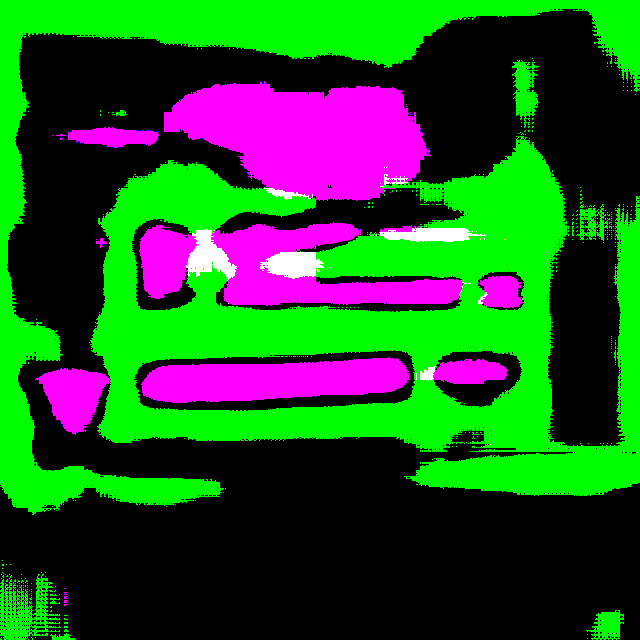

In [22]:
import numpy as np

x = pred["maps"].numpy().squeeze()
x = np.transpose(x, axes=(1, 2, 0))
x.shape
from PIL import Image

x = (x > 0.5).astype(np.uint8)*255
x.shape
Image.fromarray(x).show()


*******Checked Dir List*******
/home/dataset/AIHUB/korean_image/train1/source/간판/가로형간판
******************************


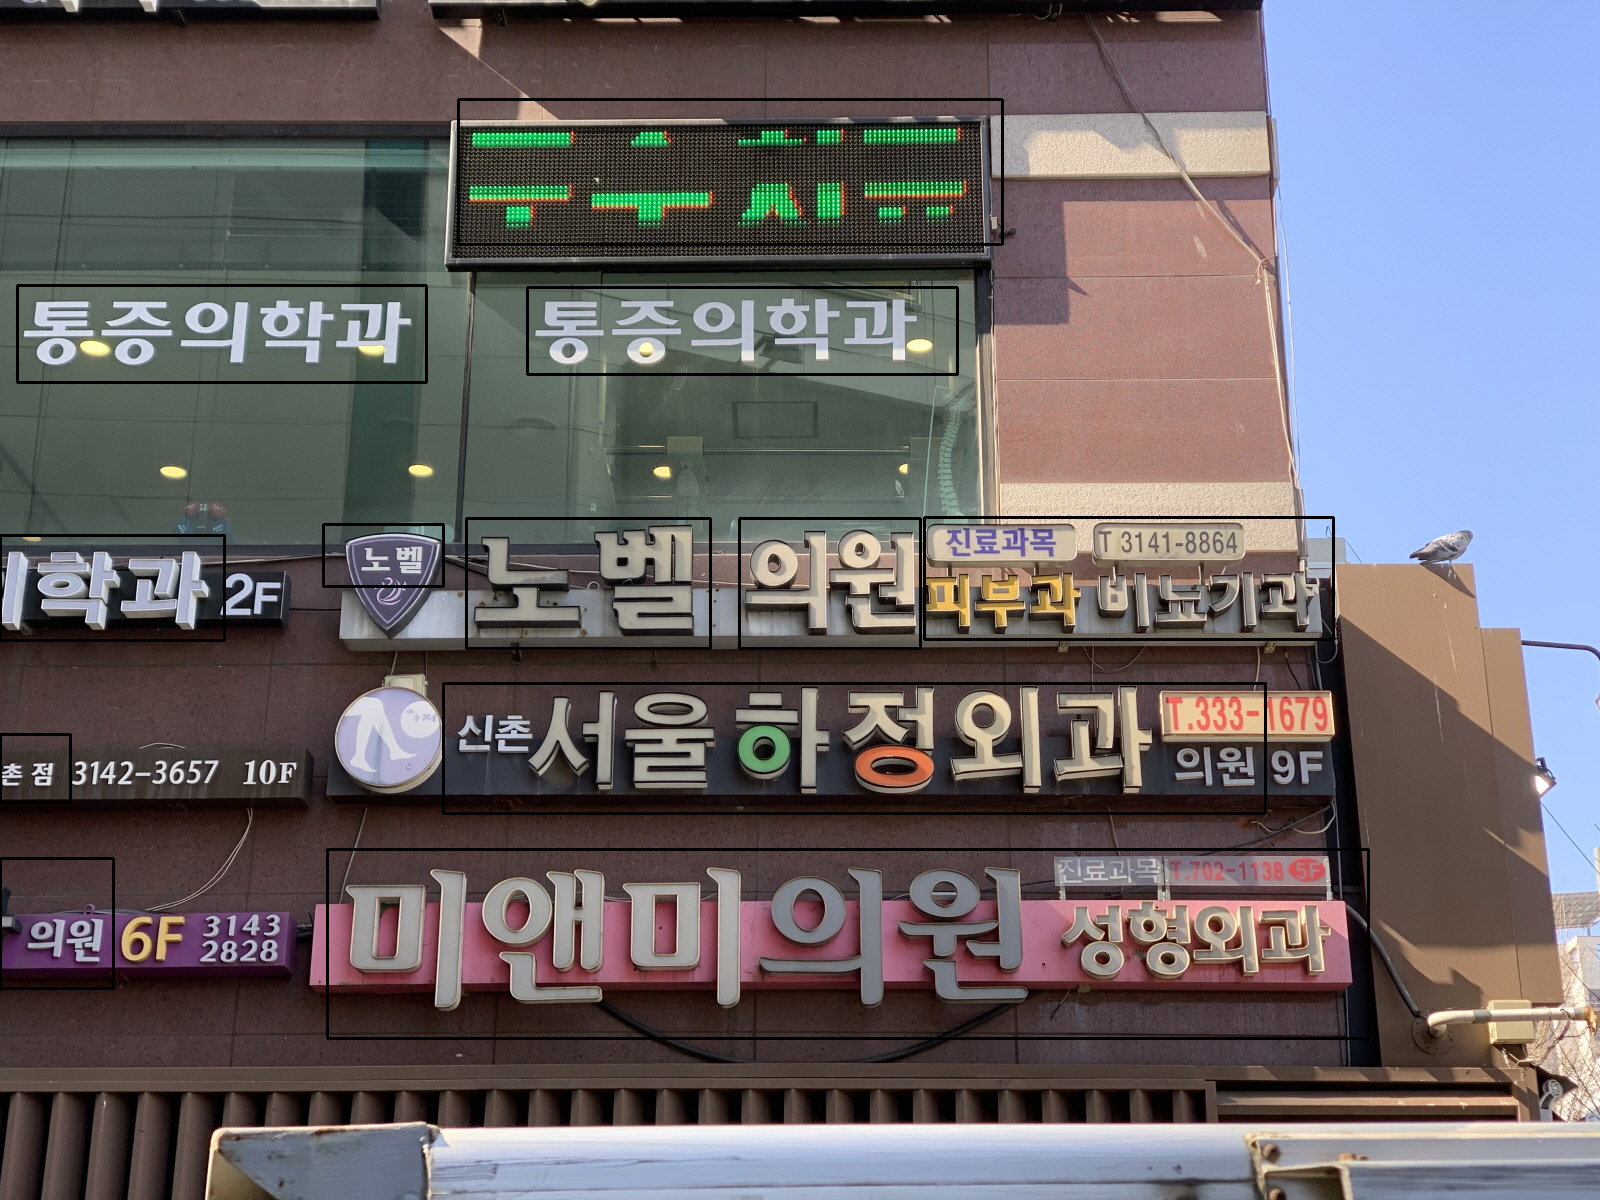

In [17]:
# Image.open()
from dataset.aihub.hangul_real_image_dataset.config_loader import YamlConfigLoader
from dataset.aihub.hangul_real_image_dataset.aihub import HangulRealImageDatasetOganizer, HangulRealImageDataset, HangulRealImageDataset_to_PaddleOCR

DEFALT_CONFIG_PATH = "/home/code/dataset/aihub/hangul_real_image_dataset/config.yml"
path = "/home/dataset/AIHUB/korean_image/train2/source/간판/가로형간판/가로형간판5/간판_가로형간판_146244.jpg"
config = config = YamlConfigLoader.load_config(DEFALT_CONFIG_PATH)  
dataset = HangulRealImageDataset(config)
x = dataset.load_image(path)
y = dataset.load_label(path.replace("source", "label").replace("jpg", "json"))
det_dataset = dataset.get_box_detection_dataset()
det_dataset.show_xy(det_dataset.to_box_detextion_x(x), det_dataset.to_box_detextion_y(y))


In [15]:
import paddle

gpu_available  = paddle.device.is_compiled_with_cuda()
print("GPU available:", gpu_available)

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script


GPU available: True


In [69]:
model = paddle.nn.Linear(3, 1)
print(model.state_dict())
paddle.save(model.state_dict(), "/home/test/model.pdiparamsss")

OrderedDict([('weight', Parameter containing:
Tensor(shape=[3, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[-0.82215434],
        [ 0.03054924],
        [ 0.95529938]])), ('bias', Parameter containing:
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [0.]))])


In [72]:
paddle.save(model, "/home/test/model.pdmodel")

ValueError: paddle do not support saving `paddle.nn.Layer` object.

In [71]:
model = paddle.nn.Linear(3, 1)
print(model.state_dict())
model.load_dict(paddle.load("/home/test/model.pdiparamsss"))
print(model.state_dict())

print(type(model.state_dict()))



OrderedDict([('weight', Parameter containing:
Tensor(shape=[3, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[ 0.06659265],
        [ 0.62681735],
        [-0.29351181]])), ('bias', Parameter containing:
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [0.]))])
OrderedDict([('weight', Parameter containing:
Tensor(shape=[3, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[-0.82215434],
        [ 0.03054924],
        [ 0.95529938]])), ('bias', Parameter containing:
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [0.]))])
<class 'collections.OrderedDict'>


In [ ]:
import collections.OrderedDict

In [ ]:

model.load_dict()

In [60]:
model = paddle.nn.Linear(3, 1)
# model.save("")
model.state_dict()

paddle.save(model.state_dict(), "/home/test/model.pdparams")
paddle.save(model.state_dict(), "/home/test/model.pdparams")
# import paddle.fluid.io

# paddle.fluid.io.save_inference_model(model, f)

In [80]:
import paddle

# paddle.nn.Linear(3, 1).save_inference_model("/home/test/test.pdmodel")


print(type(paddle.nn.Linear(3, 1)))

model = paddle.nn.layer.common.Linear(3, 1)

paddle.jit.save(model, "/home/test/test.pdmodel")



<class 'paddle.nn.layer.common.Linear'>


ValueError: No valid transformed program for function: forward(input), input_spec: None.
	    Please specific `input_spec` in `@paddle.jit.to_static` or feed input tensor to call the decorated function at once.


In [74]:
import paddle

config = paddle.inference.Config("/home/test/model.mobilenet_v1.pdmodel", "./mobilenet_v1.pdiparams")

# 根据 config 创建 predictor
predictor = paddle.inference.create_predictor(config)

RuntimeError: (NotFound) Cannot open file ./mobilenet_v1.pdmodel, please confirm whether the file is normal.
  [Hint: Expected static_cast<bool>(fin.is_open()) == true, but received static_cast<bool>(fin.is_open()):0 != true:1.] (at ../paddle/fluid/inference/api/analysis_predictor.cc:2364)


In [36]:
import paddle

class MyLayer(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        self._linear1 = 
        print(self._linear1.weight)
        pass
    
    def forward(self, input):
        return self._linear1(input)
    
mylayer = MyLayer()
x = paddle.randn([3], "float32")
print(x)
mylayer.eval()  # set mylayer._dropout to eval mode
out = mylayer(x)
print(out)
mylayer.train()  # set mylayer._dropout to train mode
out = mylayer(x)
print(out)

Parameter containing:
Tensor(shape=[3, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[ 0.62206370],
        [-0.53300339],
        [ 0.59778345]])
Tensor(shape=[3], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [-1.39317989,  0.76278561, -0.08508420])
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [-1.32407594])
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [-1.32407594])


Tensor(shape=[3], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [-1.39317989,  0.76278561, -0.08508420])
Tensor(shape=[3], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [ 0.62206370, -0.53300339,  0.59778345])


Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [-1.32407594])

In [31]:
x = paddle.randn([[1,1,1], [2,2,2]], "float32")

ValueError: (InvalidArgument) gaussian(): argument (position 1) must be list of int, but got list at pos 0 (at ../paddle/fluid/pybind/op_function_common.cc:475)


In [ ]:
layer = paddle.nn.Linear(3, 1)
x = 

In [20]:
import paddle

class MyLayer(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        self._linear1 = paddle.nn.Linear(1, 1)

    def forward(self, input):
        temp = self._linear1(input)
        return temp

x = paddle.randn([10, 1], 'float32')
mylayer = MyLayer()

In [15]:
import paddle

class MyLayer(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        self._linear1 = paddle.nn.Linear(1, 1)

    def forward(self, input):
        temp = self._linear1(input)
        return temp

x = paddle.randn([10, 1], 'float32')
mylayer = MyLayer()
mylayer.eval()  # set mylayer._dropout to eval mode
out = mylayer(x)
mylayer.train()  # set mylayer._dropout to train mode
out = mylayer(x)

In [84]:
import paddle.nn

paddle.nn.Linear((1, 2), [3])

TypeError: '>' not supported between instances of 'tuple' and 'int'

In [108]:
IMAGE_SIZE = 1
CLASS_NUM = 3

class LinearNet(paddle.nn.Layer):
    def __init__(self):
            super(LinearNet, self).__init__()
            self._linear= paddle.nn.Linear(IMAGE_SIZE, CLASS_NUM)

    @paddle.jit.to_static
    def forward(self, x):
        return self._linear(x)

layer= LinearNet()

path= "/home/test/model/inference"
paddle.jit.save(layer, path)

TypeError: The type of 'function' should be a function or method, but received type.

In [96]:
import paddle

@paddle.jit.to_static
def func1(x):
    return x+1

x = paddle.ones([2, 2])

func1(x)

paddle.jit.save(func1, "/home/test/model.pdmodel")

/usr/local/lib/python3.7/dist-packages/paddle/jit/api.py:945: UserWarning: What you save is a function, and `jit.save` will generate the name of the model file according to `path` you specify. When loading these files with `jit.load`, you get a `TranslatedLayer` whose inference result is the same as the inference result of the function you saved.
  'What you save is a function, and `jit.save` will generate the name of the model file according to `path` you specify. When loading these files with `jit.load`, you get a `TranslatedLayer` whose inference result is the same as the inference result of the function you saved.'
/usr/local/lib/python3.7/dist-packages/paddle/static/io.py:994: UserWarning: no variable in your model, please ensure there are any variables in your model to save
  "no variable in your model, please ensure there are any variables in your model to save"


In [98]:
model = paddle.jit.load("/home/test/model.pdmodel")
model.state_dict()

OrderedDict()

In [95]:
import paddle

def func2(x):
    return x+1

x = paddle.ones([2, 2])

func2(x)

Tensor(shape=[2, 2], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[2., 2.],
        [2., 2.]])

In [113]:
import paddle

class MyLayer(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        self.layer1 = paddle.nn.Linear(1, 3)
        self.layer2 = paddle.nn.Linear(3, 1)
    
    @paddle.jit.to_static
    def forward(self, input):
        input = self.layer1(input)
        input = self.layer2(input)
        return input
    

model = MyLayer()
x = paddle.randn([3, 1])

y = model(x)
print(y)


paddle.jit.save(model, "/home/test/model/model1.pamodel")
model2 = paddle.jit.load("/home/test/model/model1.pamodel")
y2 = model2(x)
print(y2)

Tensor(shape=[3, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[-0.20148109],
        [ 0.53908861],
        [-0.21063973]])
Tensor(shape=[3, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[-0.20148109],
        [ 0.53908861],
        [-0.21063973]])


In [114]:
paddle.nn.Liear

import paddle.nn



AttributeError: module 'paddle.nn' has no attribute 'Liear'

In [121]:
model = paddle.nn.Linear(in_features=None, out_features=None)


TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [132]:
model = paddle.nn.Linear(1, 2)


x = paddle.randn([30, 30])
# model(x)
model.forward(x)

ValueError: (InvalidArgument) Input(Y) has error dim.Y'dims[0] must be equal to 30But received Y'dims[0] is 1
  [Hint: Expected y_dims[y_ndim - 2] == K, but received y_dims[y_ndim - 2]:1 != K:30.] (at ../paddle/phi/kernels/impl/matmul_kernel_impl.h:324)
  [operator < linear > error]

In [131]:
paddle.in_dynamic_mode()

True

Parameter containing:
Tensor(shape=[1, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[0.01287939]])
Parameter containing:
Tensor(shape=[1, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[0.01287939]])


In [149]:
model.weight.gradient

<bound method monkey_patch_tensor.<locals>.gradient of Parameter containing:
Tensor(shape=[1, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[0.01287939]])>

In [167]:
model = paddle.nn.Linear(1, 1)
x = paddle.to_tensor([2], dtype = "float32")
model.weight.gradient

model.weight.gradient
model.weight.clear_gradient()
model.weight.gradient

<bound method monkey_patch_tensor.<locals>.gradient of Parameter containing:
Tensor(shape=[1, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[1.04335737]])>

In [8]:
import paddle
paddle.fluid.io.save_inference_model()

TypeError: missing a required argument: 'dirname'